In [88]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
from ngrams import corpus_from_file, Ngram
from ngrams import (
    SENTENCE_START, SENTENCE_END, 
    SCENE_START, SCENE_END, 
    EPISODE_START, EPISODE_END 
)

### Crear y fitear modelo

In [102]:
ngram = Ngram(4)
corpus = corpus_from_file("friends_corpus.txt")
all_tokens = ngram.fit(corpus)

In [103]:
for tokens in all_tokens:
    print(" ".join(tokens))

<e> <l> <l> <l> friends
 </l>
<l> <l> <l> 917 - the one with the memorial service
 </l>
<l> <l> <l> story by: robert carlock
 </l>
<l> <l> <l> directed by: gary halvorson
 </l>
<s> <l> <l> <l> [scene: ross' apartment , chandler and joey enter]
 </l>
<l> <l> <l> chandler: hey! ready to go?
 </l>
<l> <l> <l> ross: oh yeah, let me just finish this.
 </l>
<l> <l> <l> joey: hey ross, check this out! (he tries to spin a basketball on his fingertip but he throws it against a table) yeah, i can't do that!
 </l>
<l> <l> <l> chandler: what are you doin'?
 </l>
<l> <l> <l> ross: have you seen this? it's a new alumni website for college! it's cool! you can post messages for people, let everyone know what you're up to.
 </l>
<l> <l> <l> chandler: great, a faster way to tell people that i'm unemployed and childless .
 </l>
<l> <l> <l> ross: it's actually kinda interesting to find out what people are doing... remember andrea rich?
 </l>
<l> <l> <l> chandler: the tall girl who wouldn't sleep with you?

### Generar texto

In [104]:
from IPython.display import display

In [ ]:
new_line = ngram.generate(context="story by:", temperature=1)

display(new_line)

' mark j. kunerth & pang-ni landrum\n </l>'

In [ ]:
new_scene = ngram.generate_scene(context="[Scene: Phoebe dies] \n", temperature=0.5, max_sentences=100)

print(new_scene)

[Scene: Phoebe dies] 
 joey: we good? yeah? good? once again, i pronounce you husband and wife. (to chandler) now kiss her again.
 </l>  
 </l> monica: oh my god!
 </l> ross: okay, that's great. (susan gives her drink to carol.) no, i'm- oh. 
 </l> the one with the vows
 </l> monica: (to chandler) we're not really gonna buy that it just *fell* out of the room.) oh, good, there you are! i had to ask someone what it’s called when chandler: thank you. i got a yentel soup, a james beans, and a coke-(yelps in
 </l> monica: if you want, i have a weapon!
 </l> phoebe: really?! i looked into that. yeah, but, i mean it was small, but kind of spectacular.
 </l> (she crosses the line and they all stare at him.) no baby!
 </l> chandler: really?� you're gonna be family, and there is nothing wrong with you.
 </l> ross: okay.
 </l> [they get back to work! break time's over!
 </l> monica: it’s all everybody at the restaurant sometime in the next few minutes.
 </l> ross: no, god! hey, rach, you've been

In [124]:
title = "The One with the Gun"
episode = ngram.generate_episode(
    context=title, temperature=0.4, max_lines_per_scene=100
)

# Save the generated episode to a file
with open(f"{title.lower().replace(' ', '_')}.txt", "w") as f:
    f.write(episode)

print(episode)

The One with the GunThe One with the Gun ross: well, i thought you were great in those commercials.
 </l> monica: you know what? you're right, i don't have a fax machine.
 </l> chandler: i can’t believe you bought this.
 </l> monica: what is it?
 </l> ross: hey, i married a lesbian to make you feel any better, i wish my date hadn't shown up.
 </l> monica: oh, i can't believe you guys are gonna have to get struck by lightning on a miniature golf course.
 </l> rachel: oh my god, oh my god, is that still...
 </l> rachel: oh my god, are you okay?
 </l> phoebe: okay. (the gang is now eaves dropping in on the group hug.)
 </l> monica: you know what? i think we should try to patch things up, y’know? like uh, maybe we could go to the russian tea room, and i had that dream joey: i don’t know! i mean, maybe you were having trouble finding a santa costume, so i borrowed one from a guy at work!
 </l> chandler: oh, i just thought it was a fight. you deal with it? think of it as a…a two month annive

### _TODO_: Evaluación del modelo 

In [52]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(corpus, test_size=0.2, random_state=42, shuffle=True)
ngram.fit(train)

print(ngram.perplexity(test))

1.1095648957758505e-12


In [8]:
test[11]

"KRAMER: Oh, yeah yeah, I have to. I'm your fiancé, Peter Von Nostrand.\n"

In [9]:
from matplotlib import pyplot as plt

## Experimentación

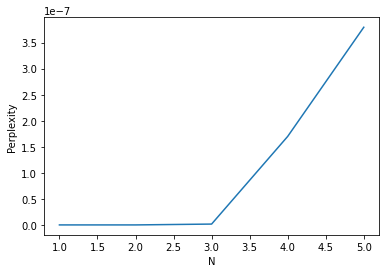

In [45]:
# ¿Como es la calidad de los textos generados, a medida que aumentan n y/o la cantidad de datos de entrenamiento? ¿Que tipos de errores seproducen?

ppls = []
for i in range(1, 6):
    ngram = Ngram(i)
    ngram.fit(train)
    ppls.append(ngram.perplexity(test))

fig, ax = plt.subplots()
ax.plot(range(1, 6), ppls)
ax.set_xlabel("N")
ax.set_ylabel("Perplexity")
plt.show()

## Generación